<a href="https://colab.research.google.com/github/layannee/laycrud/blob/master/EstudoDirigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Federal de Ciência e Tecnologia da Paraíba**
  
**Alunos**: Layanne Kelly Gomes Santos (201911210006) e Kilary Bayma Ximenes Vasconcelos (20191121004)


**TRANSFORMADA DISCRETA DE FOURIER**


A transformada de Fourier em tempo discreto forneceu a representação no domínio da frequência (ω) para sequências absolutamente somáveis. Essa transformada revela o espectro do sinal discretizado, mostrando as senóides que compõem o sinal original, com suas amplitudes e fases. A principal diferença com relação à transformada de Fourier original é que o espectro é composto pelo mesmo número de frequências discretas que o número de amostras ao qual foi aplicada a transformada. Essas frequências são chamadas de raias. 
  
É obtido por amostragem da transformada de Fourier em tempo discreto no domínio da frequência (ou a transformada z no círculo unitário). Essas transformações têm duas características em comum, primeiro, as transformações são definidas para sequências de comprimento infinito e segundo, e o mais importante, são funções de variáveis ​​contínuas (ω ou z).
  
Do ponto de vista da computação numérica, essas duas características são problemáticas porque é preciso avaliar somas infinitas em incontáveis ​​frequências infinitas. Para o andamento das simulações teremos que usar de sequências e então avaliar as expressões em finitamente muitos pontos. A partir da análise de Fourier, sabemos que uma função periódica (ou sequência) sempre pode ser representada por uma combinação linear de exponenciais complexos harmonicamente relacionados (que é uma forma de amostragem).
  
O cálculo da DFT pode ser implementado de várias formas. Para calcular cada amostra $X˜(k)$, podemos implementar a soma como um loop for...end. Para calcular todos os coeficientes DFT, seria necessário outro loop for...end. Isso resultará em uma implementação aninhada de dois for...end loop. 





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
def gen_wave(freq, amp, T, shift, sr):
    time = np.arange(0, T, T/sr)
    X = amp * np.sin(2*np.pi*freq*time+shift)
    return time, X

  

In [ ]:
N = 100

In [ ]:
time, amplitude = gen_wave(2, 3, 1, 0, N)


In [ ]:
_, amplitude2 = gen_wave(5, 2, 1, 0, N)


In [ ]:
amplitude3 = amplitude + amplitude2


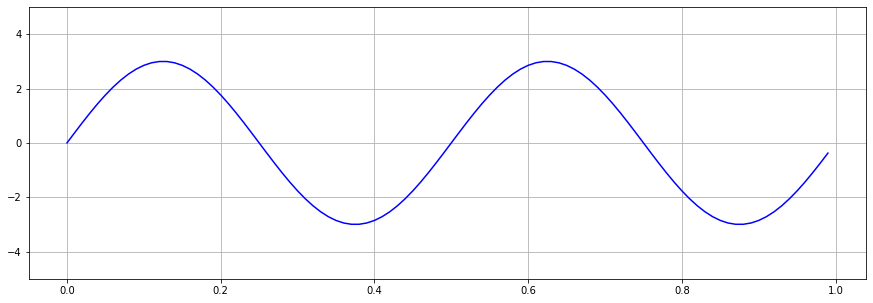

In [ ]:
plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude, c="b")

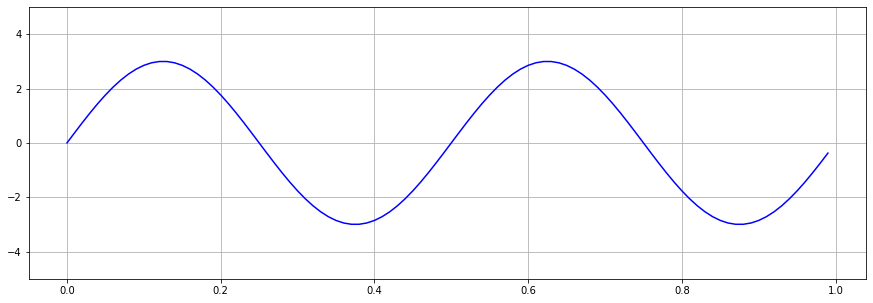

In [ ]:
plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude, c="b")

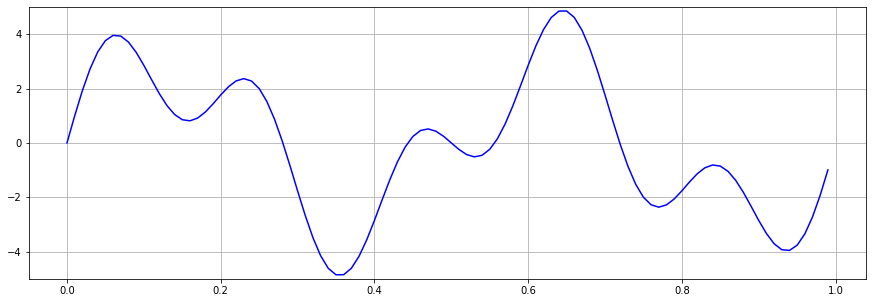

In [ ]:
plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude3, c="b")

**IMPLEMENTAÇÃO** **DE** **FILTROS** **DISCRETOS**


  
No capítulo anterior vimos a teoria dos sistemas discretos, no domínio do tempo e frequência. Nesse resumo veremos como usar essa teoria para o processamento de sinais digitais. Para isso precisamos projetar e implemnetar os filtros (IIR e FIR). Como os filtros são sistemas LTI, ou seja, sistemas lineares e invariantes, precisamos dos três elementos a seguir para descrever estruturas de filtros digitais. São eles: Somador, Multiplicador e Atraso. Usando esses elementos básicos, podemos agora descrever várias estruturas de filtros IIR e FIR. 
  
Agora para implementar um filtro IIR, temos que ter em mente que a função do sistema de um filtro IIR é dada por:
  
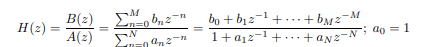
  
Onde $b^n$ e $a^n$ são os coeficientes do filtro. Ainda temos que representação da equação diferencial de um filtro IIR é expressa como:

formula
  
Com isso temos três estruturas diferentes que podem ser usadas para implementar um filtro IIR:
  
- 1. Forma direta: 
  
Nesta forma, a equação diferencial é implementada diretamente como dado. Existem duas partes para este filtro, nomeadamente o movimento parte média e a parte recursiva. Portanto, esta implementação leva a dois versões: estruturas diretas de forma I e diretas de forma II.
  
- 2. Forma em cascata: 
  
Nesta forma, a função do sistema H(z) na equação da função do filtro IIR é fatorado em seções menores de 2ª ordem, chamadas biquads. A função do sistema é então representada como um produto desses biquads. Cada O biquad é implementado de forma direta, e toda a função do sistema é implementado como uma cascata de seções biquad.
  
- 3. Forma paralela: 
  
É semelhante à forma em cascata, mas após a fatoração, uma expansão de fração parcial é usada para representar H(z) como uma soma de seções menores de 2ª ordem. Cada seção é novamente implementada de forma direta, e toda a função do sistema é implementada como uma rede paralela de seções.
  
  
Agora para implementar um filtro FIR, temos que ter em mente que a função do sistema de um filtro IIR é dada por:
  
Um filtro de resposta ao impulso de duração finita tem uma função de sistema da forma:
  
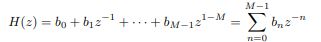
  
Portanto, a resposta ao impulso h(n) é:
  
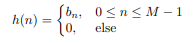
  
E a representação da equação diferencial é:
  
image.png
  
A ordem do filtro é M − 1, e o comprimento do filtro (que é igual ao número de coeficientes) é M. As estruturas de filtro FIR são sempre estáveis ​​e são relativamente simples em comparação com as estruturas IIR. Além disso, os filtros FIR podem ser projetados para ter uma resposta de fase linear, o que é desejável em algumas aplicações. 
  
Consideraremos as quatro estruturas a seguir: 
- 1. Forma direta: Nesta forma, a equação de diferenças é implementada diretamente como dado. 
  
- 2. Forma em cascata: Nesta forma a função do sistema H(z) é fatorada em fatores de 2ª ordem, que são então implementados em uma conexão em cascata. 
  
- 3. Forma de fase linear: Quando um filtro FIR tem uma resposta de fase linear, sua resposta ao impulso exibe certas condições de simetria. Desta forma, exploramos essas relações de simetria para reduzir as multiplicações pela metade. 
  
- 4. Forma de amostragem de frequência: Esta estrutura é baseada na DFT da resposta ao impulso h(n) e leva a uma estrutura paralela. Também é adequado para uma técnica de projeto baseada na amostragem da resposta em frequência $H(e^jω)$.
  
Com isso seguimos para as respectivas simulações:

  


In [ ]:
# IMPLEMENTANDO FILTRO FIR:

from scipy import signal
import numpy as np
import math as mt
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'sen(wc*n)')

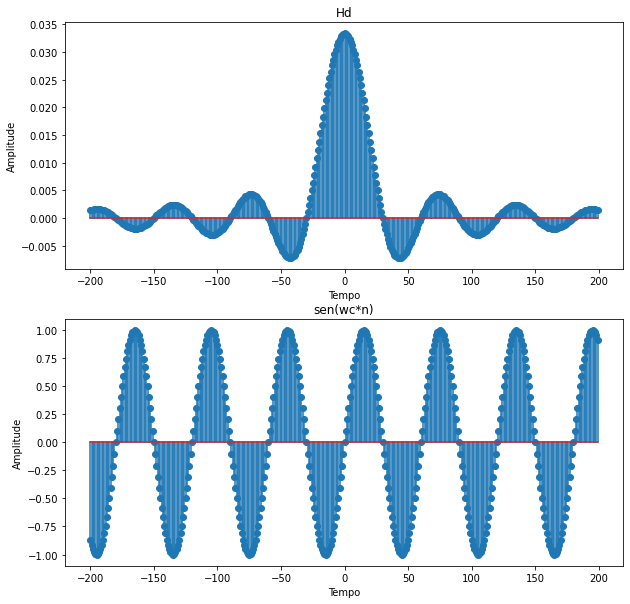

In [ ]:
#Resposta na amostra do filtro ideal

n=np.array(range(-200,200))

N=60
wc= 2*mt.pi/N
hd=np.sin(wc*n)/(mt.pi*n)
hd[np.argwhere(np.isnan(hd))[0][0]]=wc/mt.pi

fig = plt.subplots(figsize=(10,10))
#plt.subplots_adjust(wspace=.5, hspace=.8)

ax1=plt.subplot(2, 1, 1)  
ax1.stem(n,hd)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Tempo')
ax1.set_title('Hd')

ax2=plt.subplot(2, 1, 2)  
ax2.stem(n,np.sin(wc*n))
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Tempo')
ax2.set_title('sen(wc*n)')

In [ ]:
# IMPLEMENTANDO FILTRO IIR

from scipy import signal
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

In [ ]:
#Mapeando sigma
import pandas as pd
sigma = np.arange(-1, 1.5, 0.5)
z=np.exp(sigma)
result=pd.DataFrame([sigma, z]).transpose()
result.columns=[['Sigma','Módulo de Z']]
result

,Sigma,Módulo de Z
0,-1.0,0.367879
1,-0.5,0.606531
2,0.0,1.000000
3,0.5,1.648721
4,1.0,2.718282


Text(0.5, 1.05, 'Plano z')

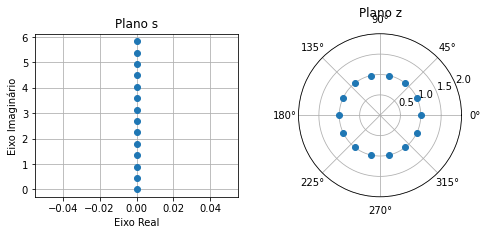

In [ ]:
N=7
w = np.arange(0, N-1, np.pi/N)

ts=10 #seg
s=complex(0,1)*w #  Plano S 
z=(1+s)/(1-s) # Plano Z 

fig = plt.subplots(figsize=(8,3))
ax1=plt.subplot(121)  
ax1.plot(np.real(s),np.imag(s),'o')
ax1.set_ylabel('Eixo Imaginário')
ax1.set_xlabel('Eixo Real')
ax1.set_title('Plano s')
ax1.grid()

ax2=plt.subplot(122,projection='polar')  
ax2.plot(w,abs(z),'o')
ax2.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax2.set_title("Plano z", va='bottom')

In [ ]:
wsz=pd.DataFrame([w,s,z]).transpose()
wsz.columns=[['w','s','z']]
wsz.head(3)

,w,s,z
0,0.000000+0.000000j,0.000000+0.000000j,1.000000+0.000000j
1,0.448799+0.000000j,0.000000+0.448799j,0.664696+0.747114j
2,0.897598+0.000000j,0.000000+0.897598j,0.107615+0.994193j


In [ ]:
mu=0.1
gama=0.1
alpha=(1-mu)/mu
beta=gama/(1-gama)
wp=10 #rad/s
ws=30
N=round(1/2*(np.log(alpha/beta))/np.log(ws/wp),2)
N

2.0

In [ ]:
wc=round(ws/(alpha)**(1/(2*N)),2)
wc

17.32

In [ ]:
wc=round(wp/(beta)**(1/(2*N)),2)
wc

17.32

In [ ]:
coeff = [1/(wc**4),0,0,0,1]
rootcoeff=np.roots(coeff)
rootcoeff

array([-12.24708945+12.24708945j, -12.24708945-12.24708945j,
        12.24708945+12.24708945j,  12.24708945-12.24708945j])

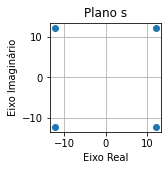

In [ ]:
fig = plt.subplots(figsize=(2,2))
ax1=plt.subplot(111)  
ax1.plot(np.real(rootcoeff),np.imag(rootcoeff),'o')
ax1.set_ylabel('Eixo Imaginário')
ax1.set_xlabel('Eixo Real')
ax1.set_title('Plano s')
ax1.grid()
plt.savefig('Aula5.jpeg',dpi=300)

In [ ]:
w=np.array(range(0,500))/10
s=complex(0,1)*w
Hs=300/(s**2+24.5*s+300)

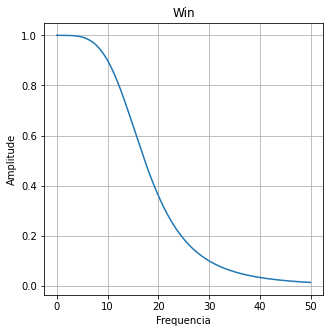

In [ ]:
fig = plt.subplots(figsize=(5,5))

ax1=plt.subplot(1, 1, 1)  
ax1.plot(w, abs(Hs)**2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')
ax1.grid()
plt.savefig('Aula5.jpeg',dpi=300)


**PROJETO FILTRO FIR**

Ao longo desse resumo será apresentado algoritmos de projeto para o filtro FIR, que são em sua maioria do tipo frequência, ou sej, projetaremos principalmente multibanda Filtros passa-baixa, passa-alta, passa-banda e para-banda. No projeto do filtro FIR também consideraremos sistemas como diferenciais ou transformadores de Hilbert, que, embora não sejam filtros seletivos de frequência, seguem a técnicas de projeto que estão sendo consideradas.
  
Sabemos que para realizar um projeto de um filtro digital são feitas 3 etapas, são elas:
  
- 1. **Especificações**: Antes de podermos projetar um filtro, devemos ter algumas especificações. Essas especificações são determinadas pelas aplicações.
  
- 2. **Aproximações**: Uma vez definidas as especificações, usamos vários conceitos para chegar a uma descrição do filtro que se aproxima do conjunto de especificações fornecido.
  
- 3. **Implementação**: O produto da etapa acima é uma descrição do filtro na forma de uma equação de diferenças, ou uma função de sistema H(z), ou uma resposta ao impulso h(n).
  
Em muitas aplicações, como processamento de sinal de voz ou áudio, filtros são usados ​​para implementar operações de seleção de frequência. Dessa forma, especificações são requeridas no domínio da freqüência em termos da magnitude desejada e resposta de fase do filtro. No caso de filtros FIR, é possível ter fase linear exata.
  
Com isso vamos considerar as especificações somente de magnitude, as mesmas são foneciadas de duas maneiras: 
  
- A primeira abordagem é chamada de especificações absolutas, que fornecem um conjunto de requisitos sobre a função de resposta de magnitude $|H(e^jω)|$. Estas especificações são geralmente usados ​​para filtros FIR.
  
- A segunda abordagem é chamadas especificações relativas, que fornecem requisitos em decibéis (dB), dado por:
  
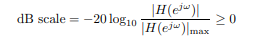
  
Esta abordagem é a mais popular na prática e é usada tanto para Filtros FIR como para IIR.


In [ ]:
from scipy import signal
import numpy as np
import math as mt
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Win')

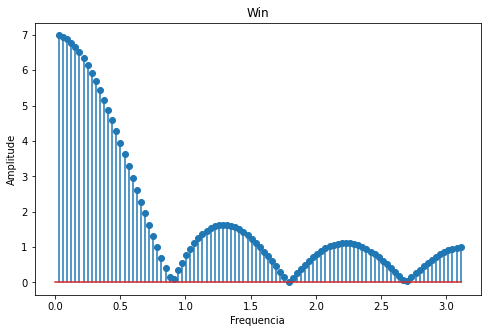

In [ ]:
#Resposta em Frequencia da Janela

omega=mt.pi*np.array(range(-100,100))/100

M=6
Win=(np.sin(omega*(M+1)/2)/np.sin(omega/2))*np.exp(-1j*omega*(M+1)/2)

fig = plt.subplots(figsize=(20,5))
plt.subplots_adjust(wspace=.5, hspace=.8)

ax1=plt.subplot(1, 2, 1)  
ax1.stem(omega[int(-len(omega)/2):], (abs(Win[int(-len(omega)/2):])))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')

tap = 5
[[-2.          0.15136535]
 [-1.          0.18709786]
 [ 0.          0.2       ]
 [ 1.          0.18709786]
 [ 2.          0.15136535]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

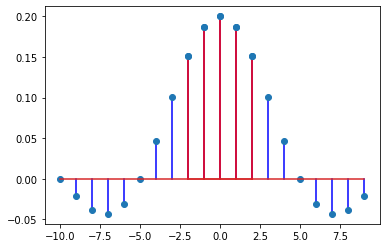

In [ ]:
#### Calcular os coeficientes do Filtro Passa-Baixo FIR com 3-
#tap, com frequência de corte 800 Hz e frequência de
#amostragem 8000 amostras/s
import pandas as pd

fc=1000
fs=8000

wc=2*mt.pi*800/8000

n=[]
h=[]
for nx in range(-10,10):
    if nx==0:
        n.append(nx)
        h.append(wc/mt.pi)
    else:
        n.append(nx)
#        h.append(wc/mt.pi*np.sin(wc*nx)/(wc*nx))
        h.append(np.sin(wc*nx)/(mt.pi*nx))

result=pd.DataFrame([n,h]).transpose()
result.columns=['n','h']
plt.stem(result['n'],result['h'],'b')

#print(wc/mt.pi)


tr=3
print('tap = '+str(2*tr-1))

hf=result[result['n']<tr][result['n']>-tr].values
print(hf)
plt.stem(result['n'][int(len(result)/2)-tr+1:-int(len(result)/2)+tr],result['h'][int(len(result)/2)-tr+1:-int(len(result)/2)+tr],'r')

[0.151, -0j]
[0.187, -1j]
[0.2, -2j]
[0.187, -3j]
[0.151, -4j]


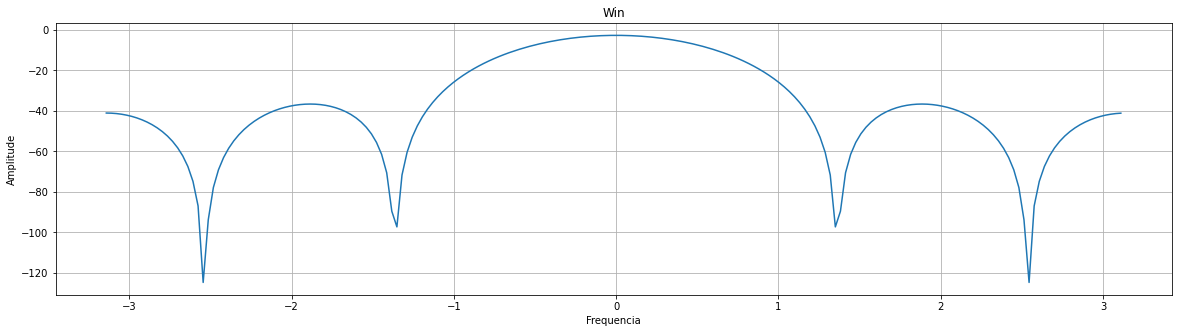

In [ ]:
w=mt.pi*np.array(range(-100,100))/100
rf=0
for k in range(len(hf)):
    
    print([round(hf[k][1],3),-complex(0,1)*k])
    rf+=hf[k][1]*np.exp(-complex(0,1)*k*w)


fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1, 1, 1)  
ax1.plot(w, 20*np.log(abs(rf)))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')
ax1.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improv

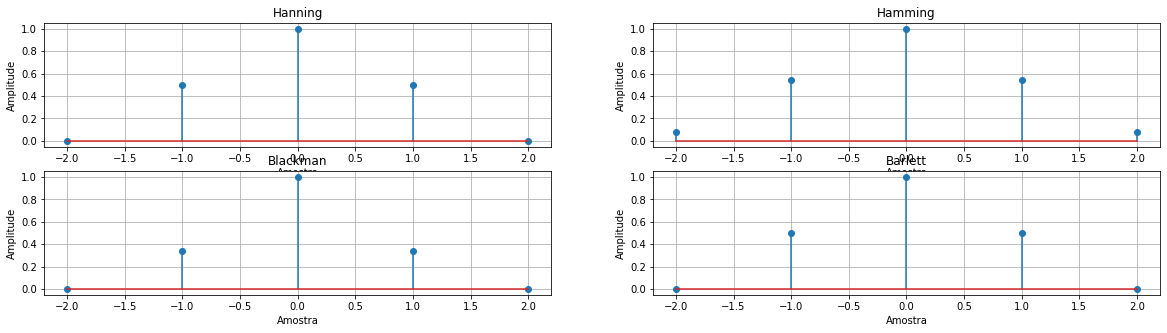

In [ ]:
M=2
n=np.array(range(-M,M+1))
Hanning=1/2+1/2*np.cos(n*mt.pi/M)  
Hamming=0.54+0.46*np.cos(n*mt.pi/M) 
Blackman=0.42+0.5*np.cos(n*mt.pi/M)+0.08*np.cos(2*n*mt.pi/M) 
Barlett=1-abs(n)/M

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(2, 2, 1)  
ax1.stem(n, Hanning)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Amostra')
ax1.set_title('Hanning')
ax1.grid()

ax2=plt.subplot(2, 2, 2)  
ax2.stem(n, Hamming)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Amostra')
ax2.set_title('Hamming')
ax2.grid()

ax3=plt.subplot(2, 2, 3)  
ax3.stem(n, Blackman)
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Amostra')
ax3.set_title('Blackman')
ax3.grid()


ax4=plt.subplot(2, 2, 4)  
ax4.stem(n, Barlett)
ax4.set_ylabel('Amplitude')
ax4.set_xlabel('Amostra')
ax4.set_title('Barlett')
ax4.grid()

[-2.100616149471482e-18, 0.06361327129762746, 0.19999999999999998, 0.06361327129762746, -2.100616149471482e-18]
[-0.0, -0j]
[0.064, -1j]
[0.2, -2j]
[0.064, -3j]
[-0.0, -4j]


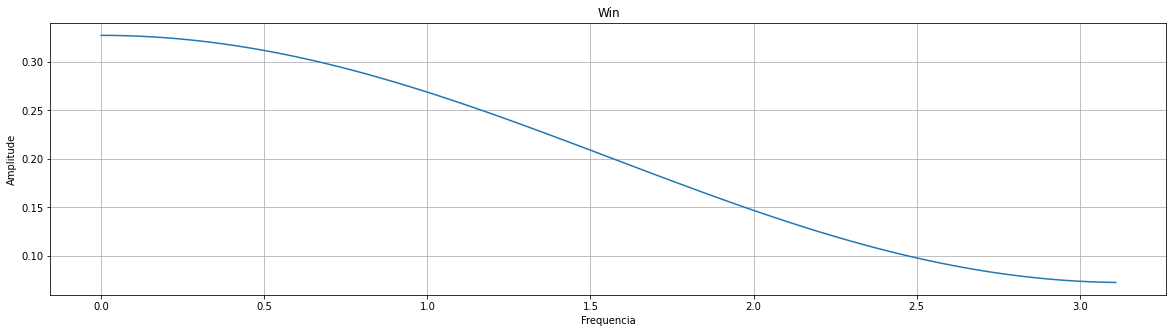

In [ ]:
hfw=[hf[i][1]*Blackman[i] for i in range(len(Blackman))]
print(hfw)
w=mt.pi*np.array(range(-100,100))/100
rf=0
for k in range(len(hf)):
    
    print([round(hfw[k],3),-complex(0,1)*k])
    rf+=hfw[k]*np.exp(-complex(0,1)*k*w)


fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1, 1, 1)  
ax1.plot(w[int(len(w)/2):], (abs(rf[int(len(w)/2):])))
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Frequencia')
ax1.set_title('Win')
ax1.grid()

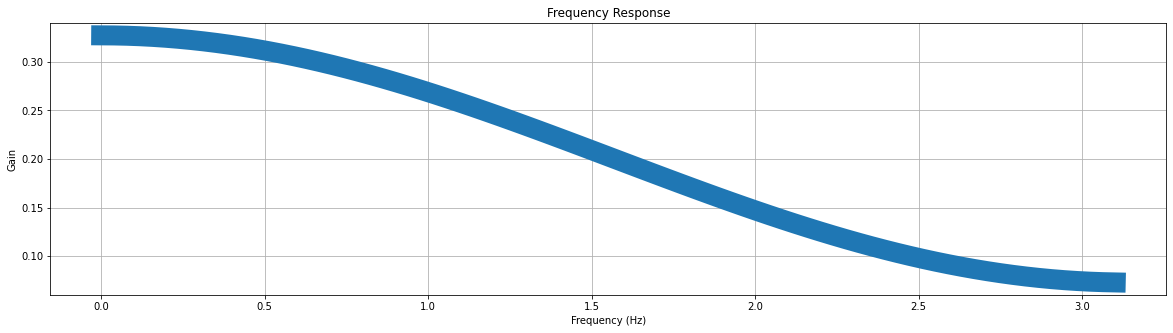

In [ ]:
# ------------------------------------------------
# Magnitude do filtro
#------------------------------------------------
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

fig = plt.subplots(figsize=(20,5))

clf()
w, h = freqz(hfw, worN=80)
plot(w, absolute(h),linewidth=20)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
#ylim(-0.05, 1.05)
grid(True)

**PROJETO FILTRO IIR**

Os filtros IIR têm respostas ao impulso de duração infinita, ou seja, podem ser combinados com filtros analógicos, os memsmos geralmente têm respostas de pulso de infinitamente longas. Dessa forma, a técnica básica de projeto de filtro IIR transforma filtros analógicos em filtros digitais usando mapeamentos. Uma das suas principais vantagens está no fato de que o projeto de filtro analógico (AFD) e os mapeamentos estão amplamentes disponíveis. Essa técnica básica é chamada de transformação de filtro A/D (analógico para digital). No entanto, as tabelas AFD estão disponíveis apenas para filtros passa-baixa. Dessa forma precisamos aplicar transformações de banda de frequência para filtros passa-baixa.
  
Existem duas abordagens para esta técnica básica de projeto de filtro IIR, são elas: 
  
- A primeira abordagem é usando o MATLAB para projetar filtros IIR. O uso direto dessas funções do MATLAB não fornece nenhum conhecimento da metodologia de projeto, portanto não será apresentado. 
  
- A segunda envolve a transformação da banda de frequência no domínio digital. Usando esses passos:
  
1. Projetar filtros passa-baixa analógicos.
2. Estudar e aplicar transformações de filtros para obtenção de filtros digitais passa-baixa.
3. Estudar e aplicar transformações de frequência de banda para obter outros filtros digitais a partir do filtro passa-baixa digital.
  
O principal problema com essas abordagens é que não temos controle
sobre as características de fase do filtro IIR. Por isso, esses projetos serão apenas em relação a magnitude, as técnicas mais sofisticadas, que podem aproximar simultaneamente a magnitude e a fase respostas, requerem ferramentas de otimização avançadas e, portanto, não serão abordados neste estudo. 
  
Começaremos com uma discussão sobre as especificações do filtro analógico e as propriedades da resposta de magnitude quadrada usada na especificação de analógico filtros e as técnicas básicas para filtros IIR gerais, consideramos o design de tipos especiais de filtros digitais. 
  
As especificações de resposta de magnitude quadrada, que são mais típicas de filtros analógicos, são dadas no relativo escala linear. 
  



In [ ]:
from scipy import signal
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

In [ ]:
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz


In [1]:
#Taxa de amostragem e frequências de corte desejadas (em Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

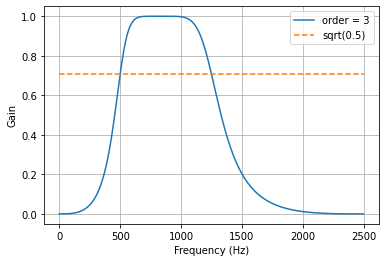

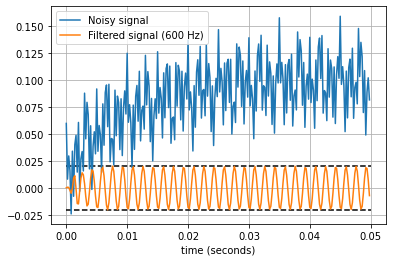

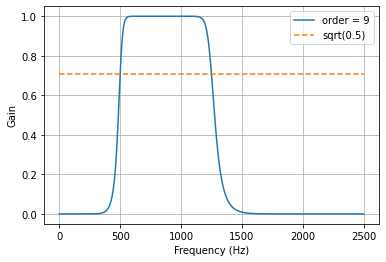

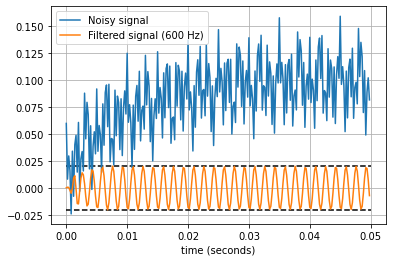

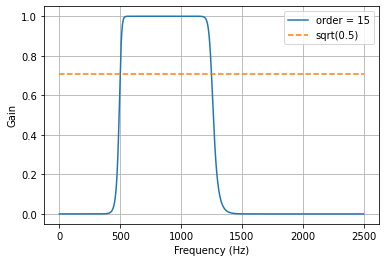

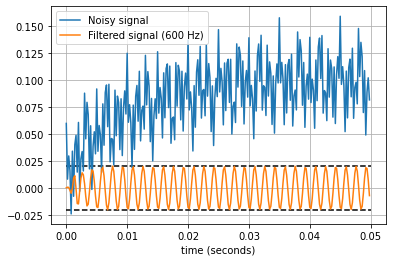

In [ ]:
#Plote a resposta de frequência para algumas ordens diferentes.
plt.figure(1)
plt.clf()
for order in [3, 9, 15]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
   
   #Filtre um sinal ruidoso.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()

**APLICAÇÕES EM COMUNICAÇÃOES**

Este último capítulo será focado nas aplicações que lidam com representação e codificação de formas de onda, especialmente codificação de voz, e com comunicações digitais. Portanto, descreveremos diversos métodos para digitalização de formas de onda analógicas, com aplicação específica à codificação e transmissão de voz. 
  
Esses métodos são modulação por código de pulso (PCM), PCM diferencial e PCM diferencial adaptativo (ADPCM), modulação delta (DM) e modulação delta adaptativa (ADM) e codificação preditiva linear (LPC). 

 
  
  


  


- Código de Pulso:
  
A modulação por código de pulso é um método para quantificar um sinal analógico para a finalidade de transmitir ou armazenar o sinal em formato digital. PCM é amplamente utilizado para transmissão de voz em comunicações telefônicas e para sistemas de telemetria que empregam transmissão de rádio.

Os sinais de voz transmitidos pelos canais telefônicos são geralmente limitados em largura de banda para a faixa de frequência abaixo de 4 kHz. Daí a taxa de Nyquist para amostragem de tal sinal é inferior a 8 kHz. No PCM, a fala analógica sinal é amostrado na taxa nominal de 8 kHz (amostras por segundo), e cada amostra é quantizada para um dos 2b níveis e representada digitalmente por uma sequência de b bits. Assim, a taxa de bits necessária para transmitir a informação digitalizada sinal de voz é de 8000 b bits por segundo.

- PCM Diferencial
  
No PCM, cada amostra da forma de onda é codificada independentemente de todas as outras amostras. A mudança média na amplitude entre amostras sucessivas é relativamente pequena. Consequentemente, um esquema de codificação que explora a redundância nas amostras resultará em uma taxa de bits mais baixa para o sinal de fala. Uma solução relativamente simples é codificar as diferenças entre amostras sucessivas em vez das próprias amostras. 
  
Como se espera que as diferenças entre as amostras sejam menores do que as amplitudes amostradas reais, são necessários menos bits para representar as diferenças. Um refinamento desta abordagem geral é prever a amostra atual com base nas amostras anteriores. Para ser específico, seja $s(n)$ a amostra atual de discurso e deixe $ˆs(n)$ denotar o valor previsto de s(n), definido como:
  
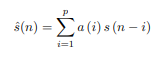


- PCM Diferencial Adaptativo
  
A técnica ADPCM emprega uma predição linear com perdas que em vez de se codificar as amostras de áudio independentemente, tal como o PCM. Ele usa a amostra anterior para prever a amostra corrente, depois calcula a diferença entre a amostra corrrente e a amostra predita e quantifica a diferença, procede-se à codificação  das diferenças Pulse Code Modulation e os seus valores preditos. Para cada entrada de uma amostra X[n], a saída do quantificador, os níveis de quantificação C[n] (códigos ADPCM correspondentes às amostras de áudio PCM) representam o nível de quantificação  para obter a amostra de aúdio reconstruída, multiplicando o número de níveis de quantificação pelo step size utilizado pelo quantificador. 


- Modulação Delta:
  
Uma modulação delta (DM ou Δ-modulação) é uma técnica de conversão de sinal analógico para digital e digital para analógico usada para transmissão de informações de voz onde a qualidade não é de importância primária. DM é a forma mais simples de modulação por código de pulso diferencial (DPCM), onde a diferença entre amostras sucessivas é codificada em fluxos de dados de n bits. Na modulação delta, os dados transmitidos são reduzidos a um fluxo de dados de 1 bit. Suas principais características são:
  
1. O sinal analógico é aproximado com uma série de segmentos.
2. Cada segmento do sinal aproximado é comparado aos bits anteriores e os bits sucessivos são determinados por esta comparação.
3. Apenas a mudança de informação é enviada, ou seja, apenas um aumento ou diminuição da amplitude do sinal da amostra anterior é enviada, enquanto uma condição de não alteração faz com que o sinal modulado permaneça no mesmo estado 0 ou 1 da amostra anterior.
  
Para atingir uma alta relação sinal-ruído , a modulação delta deve usar técnicas de sobreamostragem , ou seja, o sinal analógico é amostrado a uma taxa várias vezes maior do que a taxa de Nyquist.

In [ ]:
# MODULAÇÃO DELTA (DM)

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# inicializando o vetor de tempo
sampling_frequency = 88200 #Hz
signal_duration = 1 #seconds
time = np.arange(signal_duration*sampling_frequency) / sampling_frequency

In [ ]:
message_frequency = 40.0 #Hz
message_amplitude = 1


In [ ]:
message = message_amplitude*np.cos(2*np.pi*message_frequency*time)

In [ ]:
# frequência de amostragem delta como quatro vezes a taxa de Nyquist
delta_sampling_frequency = 16 * 2 * message_frequency # Hz

delta_epsilon = 0.25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


(0.0, 0.1, -1.0, 1.0)

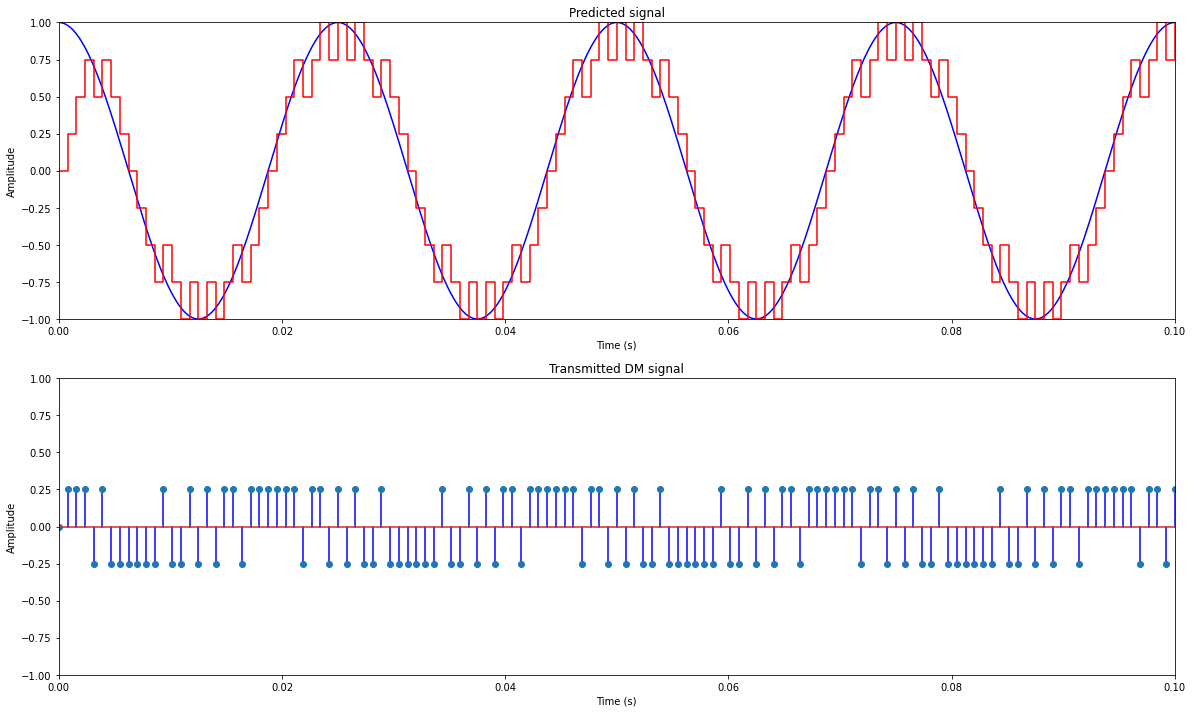

In [ ]:
# define matriz de tempo de amostra
delta_time = np.arange(signal_duration*delta_sampling_frequency) / delta_sampling_frequency

prediction = np.zeros((int(signal_duration*delta_sampling_frequency),1))
modulated = np.zeros_like(prediction)

for i, t in enumerate(delta_time):
  if i>0:
    message_sample = int(round(i*sampling_frequency/delta_sampling_frequency))    
    modulated[i] = (2*int((message[message_sample]-prediction[i-1])>0)-1) * delta_epsilon
    prediction[i] = prediction[i-1] + modulated[i]
      
# plotar sinais obtidos
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(time, message, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')
plt.axis([0, 0.1, -1, 1])

plt.step(delta_time, prediction, 'r', where='post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Predicted signal')
plt.axis([0, 0.1, -1, 1])

plt.subplot(2,1,2)
plt.stem(delta_time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Transmitted DM signal')
plt.axis([0, 0.1, -1, 1])

- Modulação Delta Adaptativa
  
A modulação delta adaptativa é uma modificação do DM em que o tamanho do passo não é fixo. Em vez disso, quando vários bits consecutivos têm o mesmo valor de direção, o codificador e o decodificador assumem que está ocorrendo sobrecarga de declive e o tamanho do passo se torna progressivamente maior. 
  
Caso contrário, o tamanho do passo torna-se gradualmente menor com o tempo. O ADM reduz o erro de inclinação, às custas de aumentar o erro de quantização. Esse erro pode ser reduzido usando um filtro passa-baixa. ADM fornece desempenho robusto na presença de erros de bit, o que significa que a detecção e correção de erros não são normalmente usadas em um projeto de rádio ADM, é esta técnica muito útil que permite a modulação delta adaptativa.

- Codificação Preditiva Linear (LPC):
  
A codificação preditiva linear é um método usado principalmente no processamento de sinais de áudio e processamento de fala para representar o envelope espectral de um sinal digital de fala em forma compactada, usando as informações de um modelo preditivo linear. É uma das técnicas de análise de voz mais poderosas e um dos métodos mais úteis para codificar voz de boa qualidade em uma taxa de bits baixa e fornece estimativas altamente precisas dos parâmetros de voz. LPC é o método mais amplamente utilizado na codificação de voz e síntese da fala.
  
LPC começa com o pressuposto de que um sinal de voz é produzida por um sinal sonoro, no final de um tubo, com ocasional adicionado sibilante e estalo sons. Embora aparentemente rudimentar, esse modelo é, na verdade, uma aproximação da realidade da produção da fala. 
